In [4]:
10

10

This is a message to myself :)

# **Pegs2020**

# Before we begin!

Let's note that Jupyter tells us the last thing we did

In [97]:
10

11

11

But we can use ``display(`` *x* ``)`` to force it to display something else.

In [98]:
display( 10 )

display( 11 )

10

11

# The basics of Python

## Basic maths

We can set *variables* and perform basic maths:

In [92]:
x = 6
y = 7
the_answer = x * y
the_answer

42

Note that variables stay alive from one block to the next:

In [91]:
the_answer

42

But we can overwrite them:

In [95]:
the_answer = "spam"
the_answer

'spam'

Assigning itself doesn't return anything (so won't be displayed)!

In [101]:
the_answer = "eggs"

## Lists

We can create and use vectors ("``lists``"):

In [99]:
x = [1, 2, 3, 4, 5]
x

[1, 2, 3, 4, 5]

In [9]:
x[2]

3

In [10]:
x[2:4]

[3, 4]

In [11]:
x[-1]

5

In [100]:
y = x + [6, 7, 8]
y

[1, 2, 3, 4, 5, 6, 7, 8]

## Strings

(text)

In [79]:
x = "world!"
x

'world!'

In [80]:
y = "hello, " + x
y

'hello, world!'

In [81]:
z = f"hello, {x}"
z

'hello, world!'

## Dictionaries

Like ``list``s, but maps one object to another...

In [105]:
x = { "TTC": "Phenylalanine",
      "CTT": "Methionine",
      "CTA": "Methionine" }

In [106]:
x["CTT"]

'Methionine'

*On two occasions I have been asked, —* "Pray, Mr. Babbage, if you put into the machine wrong figures, will the right answers come out?" *In one case a member of the Upper, and in the other a member of the Lower, House put this question. I am not able rightly to apprehend the kind of confusion of ideas that could provoke such a question.*

## Conditionals

We can conditionally execute statements:

*Scores:*

In [67]:
p1 = 1
p2 = 2

In [68]:
if p1 > p2:
    print( "player 1 wins" )
elif p1 == p2:
    print( "draw" )
else:
    print( "player 2 wins" )

player 2 wins


*(Remember to add the spaces!)*

## Loops

In [107]:
menu = ["egg + spam",
        "egg bacon + spam",
        "egg bacon sausage + spam",
        "spam bacon sausage + spam"]

In [64]:
display( f"We sell {menu[0]}." )
display( f"We sell {menu[1]}." )
display( f"We sell {menu[2]}." )
display( f"We sell {menu[3]}." )

'We sell egg + spam.'

'We sell egg bacon + spam.'

'We sell egg bacon sausage + spam.'

'We sell spam bacon sausage + spam.'

We can loop over things using `for`.

In [65]:
for meal in menu:
    display( f"We sell {meal}." )
    

'We sell egg + spam.'

'We sell egg bacon + spam.'

'We sell egg bacon sausage + spam.'

'We sell spam bacon sausage + spam.'

## Procedural

R is **functional**.

Python is (primarily) **procedural**.

So unlike R, this won't work.

In [19]:
x = [1, 2, 3, 4]
x + 10

TypeError: can only concatenate list (not "int") to list

But you can invoke functional behaviour through *list comprehension*:

In [77]:
items = [20, 10, 30]
delivery = 5
totals = [item + delivery for item in items]
totals

[25, 15, 35]

## Objects

Python is **object oriented**, and everything is an object.

In [110]:
x = [1, 2, 3]

In [111]:
x.pop()

3

In [112]:
x.append( 4 )

In [113]:
x

[1, 2, 4]

Note: You can define your own data types (that is beyond the scope of this tutorial!).

## Packages

We can import packages to help us with tasks.

``numpy`` is a package that gives us ``array`` ***objects*** that behave more like R.

In [21]:
import numpy

x = numpy.array( [1, 2, 3] )
x

array([1, 2, 3])

In [22]:
x + 10

array([11, 12, 13])

# Case study

## Installing requisites

We'll be using ``sklearn``, ``pandas``, ``matplotlib`` and ``seaborn`` for the plots.

Conveniently, once we're using Jupyter we don't need to exit if we want to install anything else, we can do it here.

Install the packages we need for the rest of this notebook!

In [34]:
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
#
# The following code sets the default figure size to be a bit
# larger, so we can see it better on screen.
#
# This slide is not displayed as part of the presentation.
#
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

## Reading a TSV

Remember we had some files *quants.tsv*, *samples.tsv*, *peptides.tsv*.

Let's start by reading in a TSV.

In [84]:
our_file = open( "/home/mjr/work/pegs2020/samples.tsv" )

data = []

for line in our_file:
    line = line.strip()
    line = line.split( "\t" )
    data.append( line )

file_in.close()
        
data

[['condition_index', 'condition_name', 'patient_index'],
 ['S0', '0', 'control', '0'],
 ['S1', '0', 'control', '1'],
 ['S2', '0', 'control', '2'],
 ['S3', '0', 'control', '3'],
 ['S4', '0', 'control', '4'],
 ['S5', '0', 'control', '5'],
 ['S6', '0', 'control', '6'],
 ['S7', '0', 'control', '7'],
 ['S8', '0', 'control', '8'],
 ['S9', '0', 'control', '9'],
 ['S10', '1', 'treatment', '0'],
 ['S11', '1', 'treatment', '1'],
 ['S12', '1', 'treatment', '2'],
 ['S13', '1', 'treatment', '3'],
 ['S14', '1', 'treatment', '4'],
 ['S15', '1', 'treatment', '5'],
 ['S16', '1', 'treatment', '6'],
 ['S17', '1', 'treatment', '7'],
 ['S18', '1', 'treatment', '8'],
 ['S19', '1', 'treatment', '9']]

## Getting someone else to read a TSV

Reading a TSV is a task that has been done a million times before though.

The ``pandas`` package can do it for us.

Let's use Pandas to read in all three of our files.

In [26]:
from pandas import read_csv

samples  = read_csv( "/home/mjr/work/pegs2020/samples.tsv",  sep = "\t", header = 0, index_col = 0 )

We can look at our data...

In [27]:
samples

,condition_index,condition_name,patient_index
S0,0,control,0
S1,0,control,1
S2,0,control,2
S3,0,control,3
S4,0,control,4
S5,0,control,5
S6,0,control,6
S7,0,control,7
S8,0,control,8
S9,0,control,9


Read in our other two files...

In [28]:
quants = read_csv( "/home/mjr/work/pegs2020/quants.tsv", sep = "\t", header = 0, index_col = 0 )
peptides = read_csv( "/home/mjr/work/pegs2020/peptides.tsv", sep = "\t", header = 0, index_col = 0 )

In [29]:
peptides

,protein,peptide,peptide_length,origin
A0,Q8TF42,RMERVVNLYMVSN,13,NormalPeptide( Protein( q = [982.9763118828521...
A1,Q8TF42,VMSYDIRSGAK,11,NormalPeptide( Protein( q = [982.9763118828521...
A2,Q8TF42,LIVWNGSTIKE,11,NormalPeptide( Protein( q = [982.9763118828521...
A3,Q8TF42,ETEIAKRSGFGAFTK,15,NormalPeptide( Protein( q = [982.9763118828521...
A4,Q8TF42,YAFKTSSQHKR,11,NormalPeptide( Protein( q = [982.9763118828521...
...,...,...,...,...
A844,Q8N4C7,GWNFDCEFRY,10,NormalPeptide( Protein( q = [1018.538363492064...
A845,Q8N4C7,CAYNWWVRIPQT,12,NormalPeptide( Protein( q = [1018.538363492064...
A846,Q8N4C7,WFVTSMVIS,9,NormalPeptide( Protein( q = [1018.538363492064...
A847,Q8N4C7,LKTQDLFCQ,9,NormalPeptide( Protein( q = [1018.538363492064...


In [30]:
quants

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19
A0,977.593702,985.306708,987.399509,984.254492,986.161852,985.154593,985.235472,986.968797,989.328374,982.103073,990.058502,983.258476,986.801601,984.034683,983.672181,984.005480,987.252111,978.141817,979.598859,986.116067
A1,988.818948,989.075220,989.493146,989.071078,988.981814,988.941592,989.352976,989.560078,987.871723,989.174907,989.303935,989.076052,988.655431,988.581178,989.154189,988.027952,988.387219,989.848597,991.024466,989.289152
A2,981.115360,984.758049,968.169698,975.111260,968.456496,982.912322,971.443995,975.772178,979.167888,970.629366,973.797446,990.236816,968.098540,997.160089,993.205379,1001.695524,983.001148,984.368655,982.361368,963.237946
A3,987.508346,973.384512,976.221921,991.723504,969.248486,971.372614,976.677378,977.713056,986.077276,981.634835,983.336795,986.265030,976.272207,985.248450,987.737445,976.851962,991.776915,968.720234,978.578477,978.295831
A4,1021.753044,1024.928823,953.734257,994.556946,1026.879202,1011.730439,982.008059,997.044642,990.210949,989.188349,967.010943,1009.215528,1008.815510,985.551465,992.008569,993.661556,1013.050545,993.078746,1007.201639,993.140245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A844,1031.893630,1018.369119,1025.604021,1043.480002,1047.050877,1027.157005,1024.450102,1030.374356,1018.573960,1021.989105,1035.002486,1019.599342,1016.518420,1037.477930,1030.549862,1023.944328,1026.566931,1030.917203,1016.003416,1037.804126
A845,1012.225181,1029.756703,1029.437918,999.875924,1024.424671,1034.863876,1035.760556,1043.130552,1013.746581,1039.101316,1017.162205,1023.260064,1025.446761,1029.728923,1060.123560,1037.613441,1050.556946,1030.215677,1023.938079,1034.037506
A846,1034.633651,1034.875826,1033.682692,1034.399345,1036.286230,1032.891619,1033.953794,1032.312728,1033.126673,1035.247252,1033.296388,1034.341587,1032.915367,1034.612443,1032.769409,1034.554492,1034.234314,1034.275688,1034.466419,1033.873581
A847,1039.120098,1025.641431,1010.064163,1037.046131,1027.877599,1023.617162,1025.392629,1030.027800,1028.537959,1023.048614,1037.388742,1031.793436,1021.712082,1034.739966,1030.427495,1040.323269,1032.799625,1028.495620,1041.885022,1015.845218


## First look - PCA (and a plot)

Let's perform a PCA of our dataset.

The ``sklearn`` package can do this sort of thing...

Note that we ``transpose`` our dataset before we continue.

In [32]:
quantsT = quants.transpose()
quantsT

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A839,A840,A841,A842,A843,A844,A845,A846,A847,A848
S0,977.593702,988.818948,981.115360,987.508346,1021.753044,987.901808,987.051420,983.915296,972.328784,917.773255,...,1012.925078,1005.671947,1039.463156,1003.186899,1003.107432,1031.893630,1012.225181,1034.633651,1039.120098,1046.223158
S1,985.306708,989.075220,984.758049,973.384512,1024.928823,984.953259,973.020353,970.603285,967.350473,920.339440,...,1010.028394,1004.525579,1048.258273,1001.454633,1009.861569,1018.369119,1029.756703,1034.875826,1025.641431,1030.644044
S2,987.399509,989.493146,968.169698,976.221921,953.734257,991.391166,976.519767,1000.178951,990.997734,930.279083,...,1008.907605,980.639444,1025.420459,1002.016718,1011.732242,1025.604021,1029.437918,1033.682692,1010.064163,989.602051
S3,984.254492,989.071078,975.111260,991.723504,994.556946,1000.109390,985.565879,985.040627,993.701100,930.041072,...,1011.811244,1006.032492,1041.399186,1002.174394,1007.031590,1043.480002,999.875924,1034.399345,1037.046131,1042.045537
S4,986.161852,988.981814,968.456496,969.248486,1026.879202,987.003438,1012.454035,977.662627,982.983799,938.828405,...,1009.697194,999.070227,1042.210841,1002.434711,1004.535058,1047.050877,1024.424671,1036.286230,1027.877599,1021.088149
S5,985.154593,988.941592,982.912322,971.372614,1011.730439,994.676518,1015.012780,1002.322390,973.857794,931.970298,...,1010.282304,992.475508,1023.040828,1002.434484,1012.868298,1027.157005,1034.863876,1032.891619,1023.617162,1032.953951
S6,985.235472,989.352976,971.443995,976.677378,982.008059,997.493578,966.169344,971.620744,993.890155,916.108159,...,1013.060241,1011.218694,1037.007788,1002.615129,1008.520508,1024.450102,1035.760556,1033.953794,1025.392629,1011.559979
S7,986.968797,989.560078,975.772178,977.713056,997.044642,998.568272,956.976537,984.223383,997.640738,927.367891,...,1013.968789,988.904018,1044.927252,1001.277202,1011.614995,1030.374356,1043.130552,1032.312728,1030.027800,1003.493013
S8,989.328374,987.871723,979.167888,986.077276,990.210949,999.196521,965.568636,985.501992,967.910603,929.381547,...,1010.081809,1024.632657,1022.387524,1002.604899,995.868875,1018.573960,1013.746581,1033.126673,1028.537959,1036.743506
S9,982.103073,989.174907,970.629366,981.634835,989.188349,979.220864,962.824423,972.751323,998.222006,925.815262,...,1010.432556,967.001858,1046.588691,1003.864146,1008.242622,1021.989105,1039.101316,1035.247252,1023.048614,1036.277520


In [72]:
from sklearn.decomposition import PCA

pc = PCA( n_components = 2 ).fit_transform( quantsT )

*Note*: `pc` is a **2** dimensioned array.

In [93]:
pc

array([[ 380.24035216,   -5.73624593],
       [ 369.39076808,    4.27471363],
       [ 399.328555  ,  119.22198112],
       [ 358.29460427,   21.65258935],
       [ 349.35385317,   -5.03663495],
       [ 352.13124604,   77.67108349],
       [ 363.45438203,  -55.98439103],
       [ 357.44806879,  -51.52049907],
       [ 350.83327263,   18.07380693],
       [ 368.80522602, -128.55785698],
       [-376.45899029, -157.04387431],
       [-359.68870031,  185.07290356],
       [-350.60700012,  -29.28099587],
       [-355.90230549, -110.35374595],
       [-363.89199905,   61.45851108],
       [-369.40511359,   31.27534312],
       [-370.41414387,   95.11826483],
       [-379.28420454, -102.17720066],
       [-355.27002085,  -36.38758982],
       [-368.35785008,   68.25983744]])

In [94]:
pc[10, 0]

-376.45899028532165

In [74]:
pc[10, :]

array([-376.45899029, -157.04387431])

Let's plot PC1 and PC2 then...

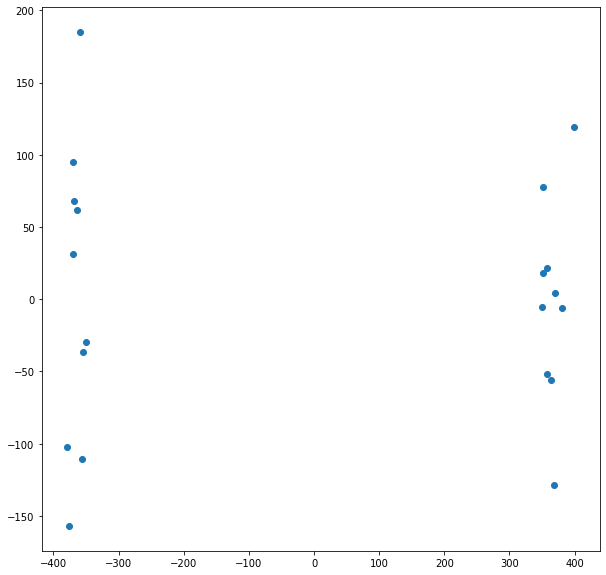

In [75]:
from matplotlib.pyplot import scatter

scatter( x = pc[:,0], y = pc[:,1] )
pass

*This plot doesn't show us much!*

### Mapping

Let's map our sample conditions on to it. Create maps (``dict``s) for colours and names.

In [72]:
colours = { 0: "dodgerblue", 1: "deeppink"   }
names   = { 0: "control",    1: "treatment"  }

In [74]:
sample_colours = [colours[x] for x in samples["condition_index"]]
sample_colours

['dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink',
 'deeppink']

Use our colours in the plot, and put the names on a legend:

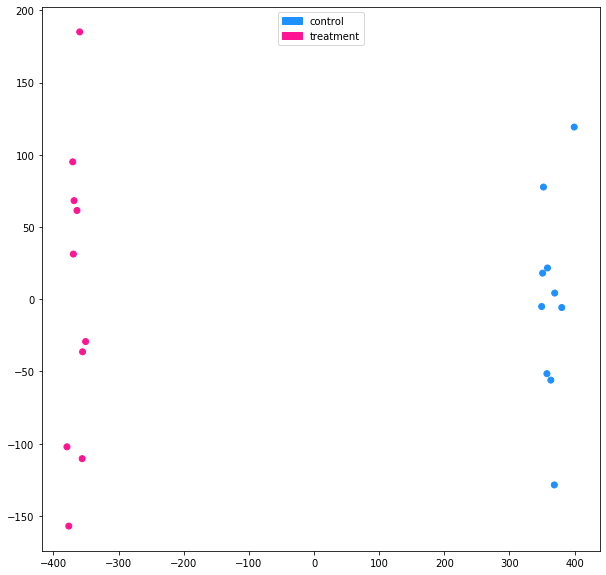

In [96]:
from matplotlib.pyplot import scatter, legend
from matplotlib.patches import Patch

scatter( x = pc[:,0], y = pc[:,1], c = sample_colours )

legend( handles = [ Patch(color = colours[0]),
                    Patch(color = colours[1]) ],
        labels  = [ names[0],
                    names[1] ],
        loc      = "upper center" )
pass

## Finding argmax
What is:

$\underset{p \in P}{\operatorname{argmax}} \sum_{s = s_0}^{s_m} X_{a,s}$

i.e. the most abundant *peptide*:

In [78]:
max_peptide_id = quantsT.apply( sum ).idxmax()
max_peptide_id

'A377'

We can find out what *protein* this *peptide* is in from the meta-data we loaded:

In [101]:
m = peptides.loc[ max_peptide_id ]
m

protein                                                      Q02962
peptide                                                IPLQDIVVHNRV
peptide_length                                                   12
origin            NormalPeptide( Protein( q = [1322.615290141028...
Name: A377, dtype: object

In [102]:
p = m.protein
p

'Q02962'

We can create the subset of all the *peptides* for this *protein*.

In [108]:
w = [x == p for x in peptides.protein]
w

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [105]:
my_protein_quants = quants[w]
my_protein_quants

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19
A375,1289.884588,1352.221385,1309.759608,1327.390776,1334.051887,1337.930460,1351.169012,1346.176773,1353.483923,1305.039661,1237.623801,1231.265472,1247.908816,1272.553242,1280.258317,1279.186572,1271.830017,1267.082044,1291.176919,1274.841449
A376,1316.820696,1330.257087,1310.743585,1324.079660,1316.984404,1324.650957,1313.952312,1308.282999,1311.527151,1322.934932,1255.443478,1254.154043,1259.105651,1248.970647,1273.004336,1249.367985,1247.551526,1263.448690,1234.272366,1263.829252
A377,1341.794567,1342.728338,1343.310928,1340.863258,1344.045378,1342.855602,1343.289117,1342.611470,1343.809108,1344.192860,1282.169417,1282.746680,1282.337149,1281.866610,1281.684609,1282.531104,1281.333598,1279.579990,1281.936016,1281.528500
A378,1332.641007,1332.608839,1333.381744,1333.038584,1333.153627,1332.057053,1331.635599,1333.550383,1331.998051,1332.697912,1269.997654,1270.391603,1271.212745,1270.421521,1270.419244,1270.962460,1271.446854,1271.458918,1270.650107,1270.851502
A379,1329.521502,1321.779244,1322.721706,1309.723440,1332.059528,1323.237750,1314.881080,1320.994012,1321.487281,1318.344750,1267.135220,1253.541182,1257.540093,1260.172730,1260.869263,1258.681056,1262.166899,1250.853962,1267.741021,1258.913105
A380,1324.333198,1330.561363,1298.390280,1347.793252,1306.113679,1298.947553,1299.313305,1297.746768,1312.536578,1319.994078,1231.861953,1251.403327,1247.327510,1258.533427,1235.854287,1225.507206,1244.025947,1249.422907,1216.392867,1227.302008
A381,1319.865880,1311.512122,1309.966652,1317.631930,1322.791563,1323.693723,1333.297816,1293.606707,1327.975269,1320.942896,1277.759025,1275.090157,1271.335132,1263.923433,1272.478293,1260.217042,1262.191640,1263.386397,1251.565150,1262.288580
A382,1321.264940,1324.473934,1314.943387,1316.369157,1335.883518,1321.850028,1313.873227,1322.918362,1302.809126,1312.389190,1254.505504,1271.629413,1267.737496,1261.247836,1263.905739,1246.328890,1258.096325,1250.640470,1246.653764,1273.303317
A383,1337.730075,1340.616437,1341.769432,1338.603084,1338.884454,1337.762267,1335.663233,1340.110830,1337.765291,1336.436643,1276.186979,1279.098278,1280.142812,1278.454116,1281.508663,1279.243636,1275.941138,1277.377168,1277.483364,1279.038428
A384,1291.103645,1309.349302,1288.512017,1326.567429,1315.703502,1318.297898,1285.845861,1300.032041,1311.861446,1309.989116,1273.298631,1242.570855,1242.721925,1255.473226,1253.327017,1258.251659,1239.935225,1268.140823,1245.684466,1262.877946


## Boxplot

Finally, we'll plot some information for our chosen *protein*:

In [70]:
from matplotlib.pyplot import boxplot, show

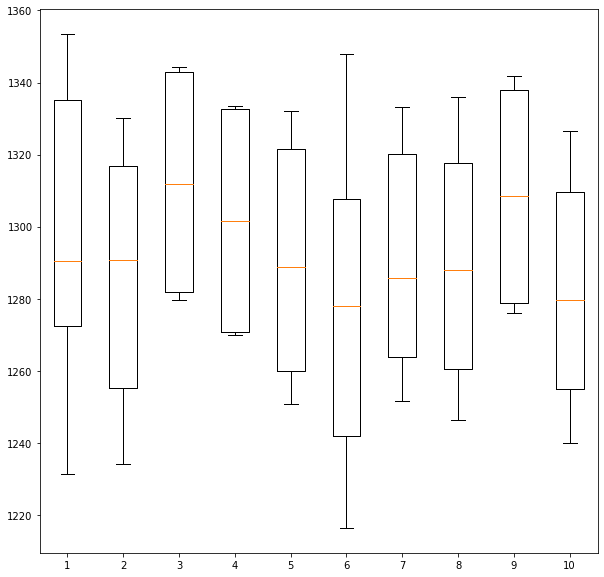

In [81]:
boxplot( my_protein_quants )  
show()

**WRONG!**

A box plot is for normally distributed data. Our data isn't, let's use a violin plot instead...

## Violin plot

In [69]:
from matplotlib.pyplot import show
from seaborn import violinplot

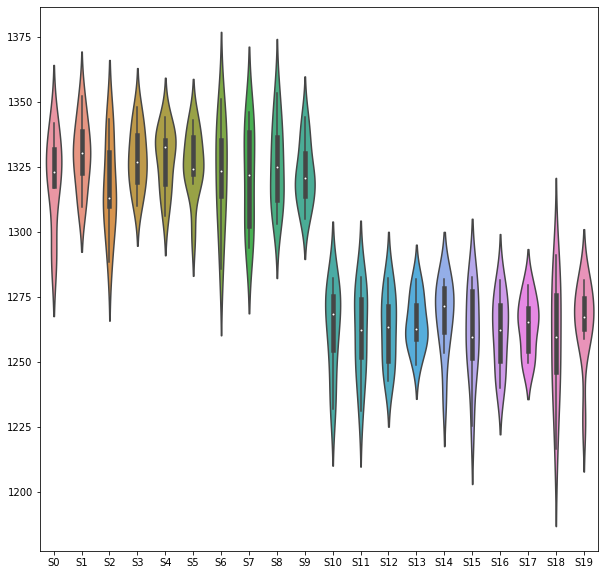

In [82]:
violinplot( data = my_protein_quants )  
show()

**WRONG!**

It's the wrong way around (we have a violin per sample, not per peptide!) `pyplot` assumes the columns are the samples, but `seaborn` assumes the samples are the rows! No worries, we just need to `transpose` to fix this:

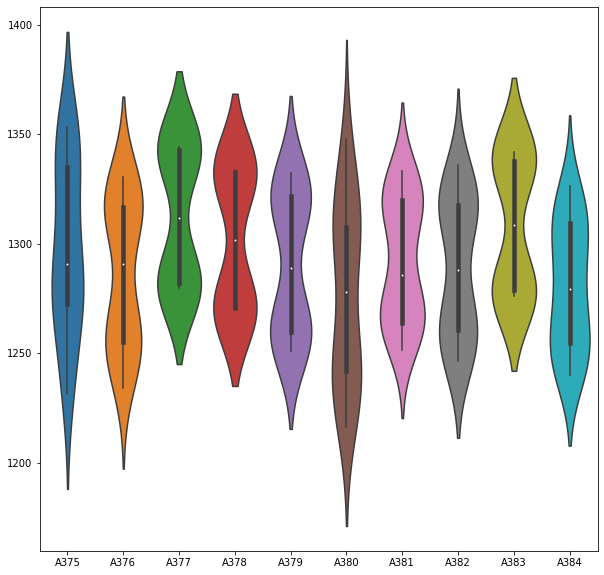

In [83]:
violinplot( data = my_protein_quants.transpose() )  
show()

There are *two* conditions per peptide, the **extra material** goes on *join* our data with our meta-data and colour our plot by these conditions.

## Wide to long

<-- EXTRA -->

We could go about making our own matrix and setting colours again, but most plotting libraries will do this for us.
However, we need to include extra information in the data.
Right now our data is in a matrix.
This isn't very helpful since we can't "put" any more data in a cell.

In [84]:
my_protein_quants

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19
A375,1289.884588,1352.221385,1309.759608,1327.390776,1334.051887,1337.930460,1351.169012,1346.176773,1353.483923,1305.039661,1237.623801,1231.265472,1247.908816,1272.553242,1280.258317,1279.186572,1271.830017,1267.082044,1291.176919,1274.841449
A376,1316.820696,1330.257087,1310.743585,1324.079660,1316.984404,1324.650957,1313.952312,1308.282999,1311.527151,1322.934932,1255.443478,1254.154043,1259.105651,1248.970647,1273.004336,1249.367985,1247.551526,1263.448690,1234.272366,1263.829252
A377,1341.794567,1342.728338,1343.310928,1340.863258,1344.045378,1342.855602,1343.289117,1342.611470,1343.809108,1344.192860,1282.169417,1282.746680,1282.337149,1281.866610,1281.684609,1282.531104,1281.333598,1279.579990,1281.936016,1281.528500
A378,1332.641007,1332.608839,1333.381744,1333.038584,1333.153627,1332.057053,1331.635599,1333.550383,1331.998051,1332.697912,1269.997654,1270.391603,1271.212745,1270.421521,1270.419244,1270.962460,1271.446854,1271.458918,1270.650107,1270.851502
A379,1329.521502,1321.779244,1322.721706,1309.723440,1332.059528,1323.237750,1314.881080,1320.994012,1321.487281,1318.344750,1267.135220,1253.541182,1257.540093,1260.172730,1260.869263,1258.681056,1262.166899,1250.853962,1267.741021,1258.913105
A380,1324.333198,1330.561363,1298.390280,1347.793252,1306.113679,1298.947553,1299.313305,1297.746768,1312.536578,1319.994078,1231.861953,1251.403327,1247.327510,1258.533427,1235.854287,1225.507206,1244.025947,1249.422907,1216.392867,1227.302008
A381,1319.865880,1311.512122,1309.966652,1317.631930,1322.791563,1323.693723,1333.297816,1293.606707,1327.975269,1320.942896,1277.759025,1275.090157,1271.335132,1263.923433,1272.478293,1260.217042,1262.191640,1263.386397,1251.565150,1262.288580
A382,1321.264940,1324.473934,1314.943387,1316.369157,1335.883518,1321.850028,1313.873227,1322.918362,1302.809126,1312.389190,1254.505504,1271.629413,1267.737496,1261.247836,1263.905739,1246.328890,1258.096325,1250.640470,1246.653764,1273.303317
A383,1337.730075,1340.616437,1341.769432,1338.603084,1338.884454,1337.762267,1335.663233,1340.110830,1337.765291,1336.436643,1276.186979,1279.098278,1280.142812,1278.454116,1281.508663,1279.243636,1275.941138,1277.377168,1277.483364,1279.038428
A384,1291.103645,1309.349302,1288.512017,1326.567429,1315.703502,1318.297898,1285.845861,1300.032041,1311.861446,1309.989116,1273.298631,1242.570855,1242.721925,1255.473226,1253.327017,1258.251659,1239.935225,1268.140823,1245.684466,1262.877946


Now we can convert our data to long format...

In [85]:
long = my_protein_quants.stack().reset_index()
long.columns = ['amino', 'sample', 'quant']
long

,amino,sample,quant
0,A375,S0,1289.884588
1,A375,S1,1352.221385
2,A375,S2,1309.759608
3,A375,S3,1327.390776
4,A375,S4,1334.051887
...,...,...,...
195,A384,S15,1258.251659
196,A384,S16,1239.935225
197,A384,S17,1268.140823
198,A384,S18,1245.684466


Remember our samples table?

In [86]:
samples

,condition_index,condition_name,patient_index
S0,0,control,0
S1,0,control,1
S2,0,control,2
S3,0,control,3
S4,0,control,4
S5,0,control,5
S6,0,control,6
S7,0,control,7
S8,0,control,8
S9,0,control,9


We can join these tables together now.

In [87]:
long2 = long.join( other = samples, on = "sample" )
long2

,amino,sample,quant,condition_index,condition_name,patient_index
0,A375,S0,1289.884588,0,control,0
1,A375,S1,1352.221385,0,control,1
2,A375,S2,1309.759608,0,control,2
3,A375,S3,1327.390776,0,control,3
4,A375,S4,1334.051887,0,control,4
...,...,...,...,...,...,...
195,A384,S15,1258.251659,1,treatment,5
196,A384,S16,1239.935225,1,treatment,6
197,A384,S17,1268.140823,1,treatment,7
198,A384,S18,1245.684466,1,treatment,8


Finally, we can plot the results.

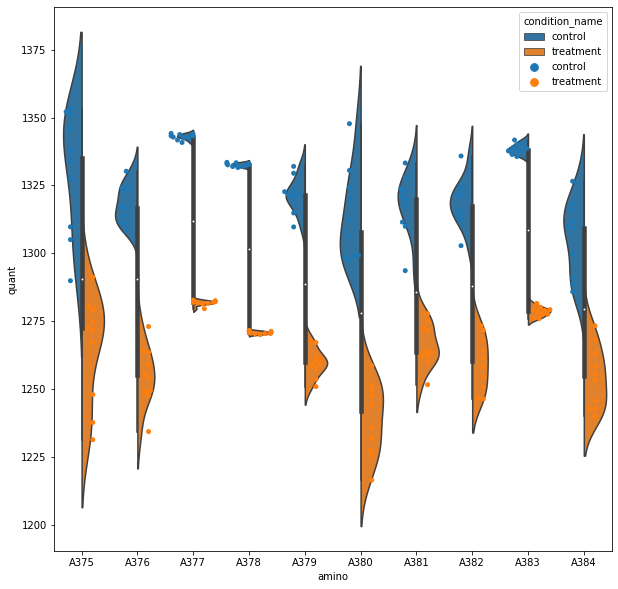

In [88]:
from seaborn import violinplot, swarmplot
violinplot( x = "amino", y = "quant", hue = "condition_name", data = long2, split = True )  
swarmplot(  x = "amino", y = "quant", hue = "condition_name", data = long2, dodge = True )  
pyplot.show()

Aside: We can *join* manually too...

In [89]:
from pandas import DataFrame
l = long.reset_index().values.tolist()
s = samples.reset_index().values.tolist()

l2 = [x + next(y for y in s if s if y[0] == x[2]) for x in l]

DataFrame( l2 )

,0,1,2,3,4,5,6,7
0,0,A375,S0,1289.884588,S0,0,control,0
1,1,A375,S1,1352.221385,S1,0,control,1
2,2,A375,S2,1309.759608,S2,0,control,2
3,3,A375,S3,1327.390776,S3,0,control,3
4,4,A375,S4,1334.051887,S4,0,control,4
...,...,...,...,...,...,...,...,...
195,195,A384,S15,1258.251659,S15,1,treatment,5
196,196,A384,S16,1239.935225,S16,1,treatment,6
197,197,A384,S17,1268.140823,S17,1,treatment,7
198,198,A384,S18,1245.684466,S18,1,treatment,8


## Not covered



Control flow:

* ``try`` / ``except`` *x* ``as`` *y* ``:`` / ``finally:`` / ``else:``
* ``break`` / ``continue``:



Data types:

| Type          | Example                     |
| ------------- | --------------------------- |
| ``tuple``     | ``(1, 2, 3)``               |
| ``set``       | ``{1, 2, 3}``               |
| ``frozenset`` | ``frozenset( {1, 2, 3} )``  |
| ``range``     | ``range( 1, 10 )``          |
| ``slice``     | ``1:10``                    |
| ``complex``   | ``5+10j``                   |

Other packages:

* ``ete``
* ``igraph``
* ``networkx``

IDEs:

* PyCharm *(free for students)*
* Visual Studio *(paid)*
* Eclipse *(free)*

and much more!

In [114]:
print( "  _______ _                 _    \r\n |__   __| |               | |   \r\n    | |  | |__   __ _ _ __ | | __\r\n    | |  | '_ \\ / _` | '_ \\| |/ /\r\n    | |  | | | | (_| | | | |   < \r\n  _ |_|  |_| |_|\\__,_|_| |_|_|\\_\\\r\n | | | |/ _ \\| | | |             \r\n | |_| | (_) | |_| |             \r\n  \\__, |\\___/ \\__,_|             \r\n   __/ |                         \r\n  |___/                          " )

  _______ _                 _    
 |__   __| |               | |   
    | |  | |__   __ _ _ __ | | __
    | |  | '_ \ / _` | '_ \| |/ /
    | |  | | | | (_| | | | |   < 
  _ |_|  |_| |_|\__,_|_| |_|_|\_\
 | | | |/ _ \| | | |             
 | |_| | (_) | |_| |             
  \__, |\___/ \__,_|             
   __/ |                         
  |___/                          
